In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

import os

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [29]:
dataset = pd.read_csv('dataset/dataset_final.csv')

In [30]:
#afficher les 5 premiers  lignes de notre dataset
dataset.head() 

,text,Dialect
0,راهو لهيك ، بالضبط قدام المكتب تع معلومات السي...,DZ
1,جامي سمعت بهاذ العنوان في هاذ الجيهة .,DZ
2,امشي قبالة حتى تشوف صيدلية .,DZ
3,شحال القهوة تع الصباح ؟,DZ
4,كيفاش نقدر نعاونك ؟,DZ


In [31]:
#afficher la dimension de notre dataset
dataset.shape

(30000, 2)

In [32]:
#afficher les noms des columns de notre datasets
dataset.columns

Index(['text', 'Dialect'], dtype='object')

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     29997 non-null  object
 1   Dialect  30000 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB


In [34]:
data=dataset

In [35]:
#faire des statistique sur les données 
data.describe()

,text,Dialect
count,29997,30000
unique,27400,3
top,معلم,DZ
freq,26,10000


In [36]:
pd.value_counts(data['Dialect'])

Dialect
DZ    10000
TN    10000
MA    10000
Name: count, dtype: int64

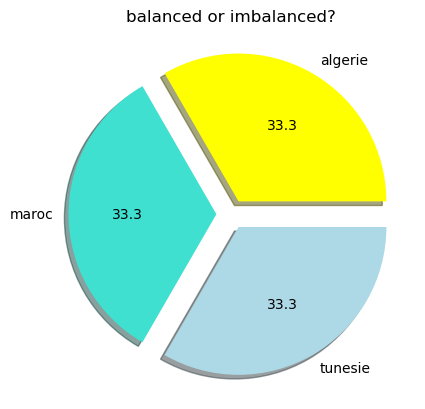

In [37]:
value_counts = pd.value_counts(data['Dialect'])
value_counts.values # converting into numpy array cause other wise we can't plot pie
label  = ['algerie','maroc',  'tunesie']
colors = ['yellow','turquoise','lightblue']


# Assurez-vous que la longueur de 'explode' correspond à celle de 'value_counts'
explode = [0.1] * len(value_counts)  # Remplir avec la même longueur que 'value_counts'

# Tracer le graphique à secteurs
plt.pie(value_counts, autopct='%0.01f', explode=explode, shadow=True, labels=label, colors=colors)
plt.title('balanced or imbalanced?')
plt.show()

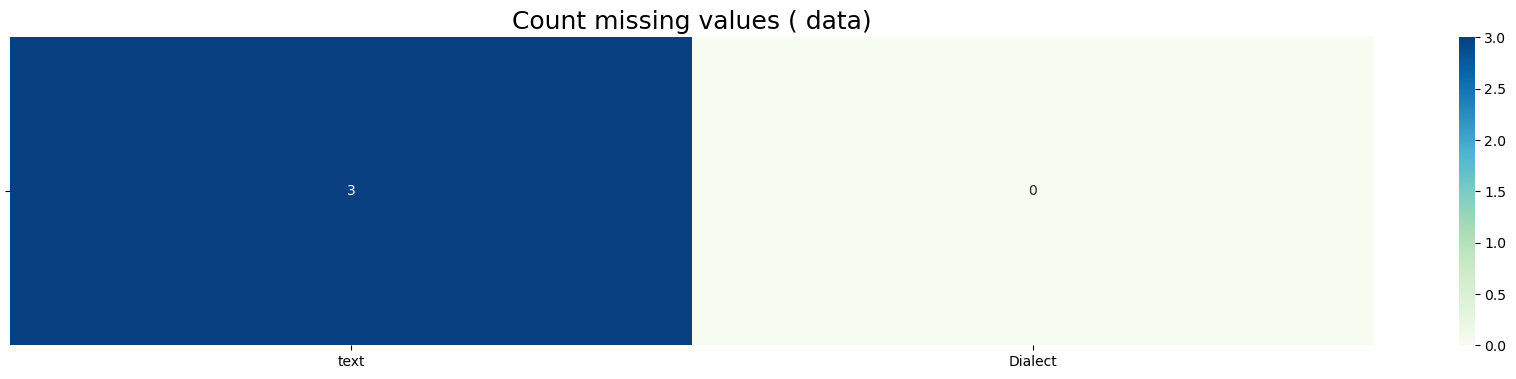

In [38]:
# Missing values ()
plt.figure(figsize=(22,4))
sns.heatmap((data.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values ( data)', fontsize=18)
plt.show()

In [39]:
data=data.dropna()

In [40]:
data.describe()

,text,Dialect
count,29997,29997
unique,27400,3
top,معلم,DZ
freq,26,10000


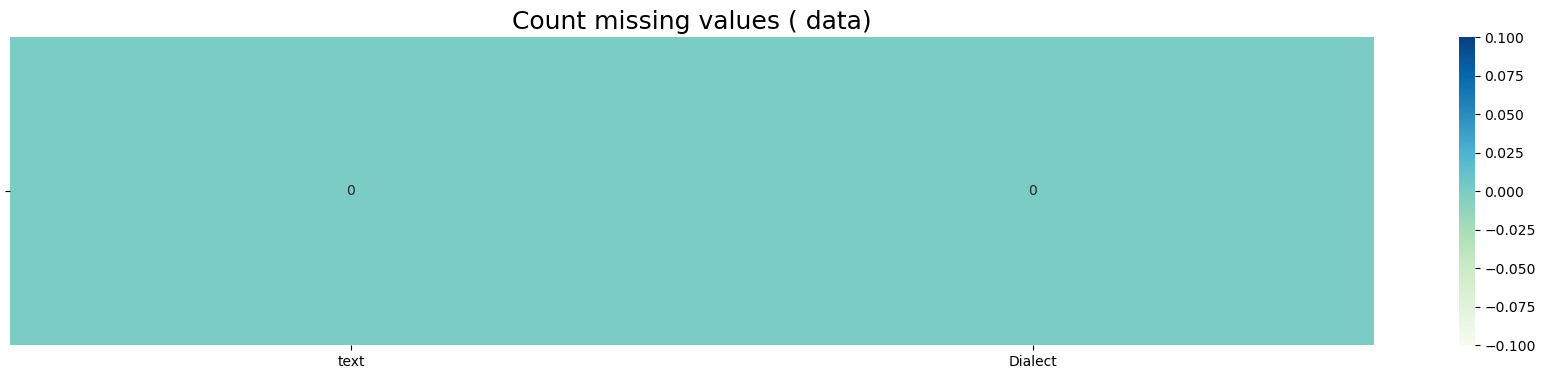

In [41]:
# Missing values ()
plt.figure(figsize=(22,4))
sns.heatmap((data.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values ( data)', fontsize=18)
plt.show()

In [42]:
# Suppression des doublons dans le DataFrame
data = data.drop_duplicates()

In [43]:
data.describe()

,text,Dialect
count,27409,27409
unique,27400,3
top,اجري,DZ
freq,2,9863


In [44]:
value_counts = pd.value_counts(data['Dialect'])
value_counts

Dialect
DZ    9863
TN    9312
MA    8234
Name: count, dtype: int64

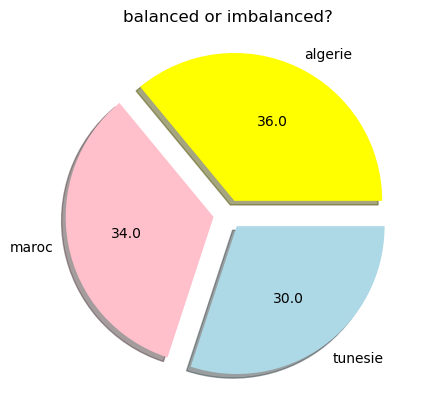

In [45]:
value_counts = pd.value_counts(data['Dialect'])
value_counts.values # converting into numpy array cause other wise we can't plot pie
label  = ['algerie','maroc',  'tunesie']
colors = ['yellow','pink','lightblue']


# Assurez-vous que la longueur de 'explode' correspond à celle de 'value_counts'
explode = [0.1] * len(value_counts)  # Remplir avec la même longueur que 'value_counts'

# Tracer le graphique à secteurs
plt.pie(value_counts, autopct='%0.01f', explode=explode, shadow=True, labels=label, colors=colors)
plt.title('balanced or imbalanced?')
plt.show()

In [46]:
def normalize_arabic_text(text):
    text = text.replace("أ", "ا").replace("إ", "ا").replace("آ", "ا")  # Normalisation de l'alif
    text = text.replace("ة", "ه")  # Conversion de "ة" en "ه"
    text = text.replace("ى", "ي")  # Conversion de "ى" en "ي"
    text = text.replace("ئ", "ي")  # Conversion de "ئ" en "ي"
    return text

data['text'] = data['text'].apply(normalize_arabic_text)


In [47]:
import re
def clean_arabic_text(text):
    # Supprimer les caractères non-arabes (ponctuation, chiffres, symboles)
    text = re.sub(r'[^ء-ي\s]', '', text)  # Garder uniquement les caractères arabes et les espaces
    return text

data['text'] = data['text'].apply(clean_arabic_text)


In [48]:
# Vérifier l'encodage (si nécessaire)
print(data['text'].apply(lambda x: isinstance(x, str)).all())  # Vérifier si toutes les valeurs sont bien des chaînes de caractères


True


In [49]:
from sklearn.utils import resample

# Identifier la classe minoritaire
min_class_size = data['Dialect'].value_counts().min()

# Sélectionner la classe minoritaire
min_class = data[data['Dialect'] == data['Dialect'].value_counts().idxmin()]
# Sélectionner les autres classes
other_classes = data[data['Dialect'] != data['Dialect'].value_counts().idxmin()]

# Sous-échantillonnage des classes majoritaires
other_classes_downsampled = other_classes.groupby('Dialect').apply(
    lambda x: resample(x, replace=False, n_samples=min_class_size, random_state=42)
).reset_index(drop=True)

# Combiner les classes sous-échantillonnées avec la classe minoritaire
dataset_balanced = pd.concat([min_class, other_classes_downsampled])

# Afficher le nombre de lignes par classe
print(dataset_balanced['Dialect'].value_counts())


Dialect
MA    8234
DZ    8234
TN    8234
Name: count, dtype: int64


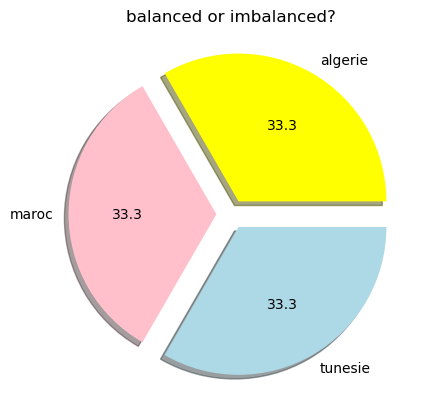

In [50]:
value_counts = pd.value_counts(dataset_balanced['Dialect'])
value_counts.values # converting into numpy array cause other wise we can't plot pie
label  = ['algerie','maroc',  'tunesie']
colors = ['yellow','pink','lightblue']


# Assurez-vous que la longueur de 'explode' correspond à celle de 'value_counts'
explode = [0.1] * len(value_counts)  # Remplir avec la même longueur que 'value_counts'

# Tracer le graphique à secteurs
plt.pie(value_counts, autopct='%0.01f', explode=explode, shadow=True, labels=label, colors=colors)
plt.title('balanced or imbalanced?')
plt.show()

In [51]:
# Sauvegarde du dataset nettoyé dans un fichier CSV
dataset_balanced.to_csv('dataset_cleaned.csv', index=False, encoding='utf-8')



In [56]:
# Afficher les statistiques de longueur par dialecte
dialect_length_stats = dataset_balanced.groupby('Dialect')['text'].describe()
print("Statistiques de longueur de texte par dialecte:")
dialect_length_stats

Statistiques de longueur de texte par dialecte:


,count,unique,top,freq
Dialect,,,,
DZ,8234,8229,ايه,2
MA,8234,8233,انا غادي لباريس,2
TN,8234,8164,معلم,8


In [57]:
dataset_balanced['text_length'] = dataset_balanced['text'].apply(len)


<Figure size 1000x600 with 0 Axes>

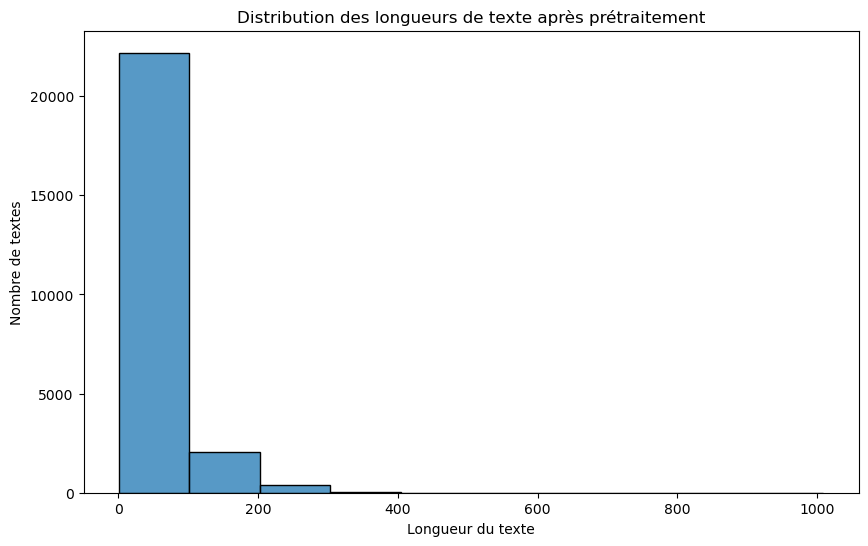

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset_balanced['text_length'], bins=10)
plt.title('Distribution des longueurs de texte après prétraitement')
plt.xlabel('Longueur du texte')
plt.ylabel('Nombre de textes')
plt.show()